Objectives
The analysis that we are going to perform shall answer the following questions:

How many restaurants in Bangalore take online orders?

What percentage of restaurants offer table booking facilities?

What was the most common rating received by restaurants?

Is there any correlation between the approximated cost for two people and the ratings of a restaurant?

The top five cities in Bangalore with the highest and lowest-rated restaurants.

Which cuisine do customers like the most?

What is the average price for two people, based on the type of service?

Does the restaurant’s rating depend on whether it accepts online orders?

What are the top 10 highest-rated restaurants?

Step 1: Import the libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('darkgrid')

Step 2: Load the dataset

In [24]:
df = pd.read_csv('C:/Users/pushk/Downloads/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Step 3: Understanding the dataset

In [25]:
df.shape

(51717, 17)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [27]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

Step 4: Data Cleaning

(a) Dropping unnecessary columns

In [28]:
df.drop(['url','address','phone','location','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)

(b) Renaming the columns

In [29]:
df=df.rename(columns={"name":'Name','rate':'Ratings','votes':'Votes','rest_type':'Rest_Type','cuisines':'Cuisines','approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City','online_order':'Takes online orders?','book_table':'Has table booking?'})

In [30]:
df.head()

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


(c) Dropping duplicate rows

In [31]:
sum(df.duplicated())
df=df.drop_duplicates()
df.shape

(51593, 10)

(d) Cleaning individual rows

removing the special char and the punctuation mark or any special char form column Name

In [32]:
def name_clean(text):
    return re.sub(r"[^a-zA-Z0-9 ]", "", text)
df['Name'] = df['Name'].apply(lambda x: name_clean(x))

now taking look at the ratings column

In [33]:
df['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

We can see that we have ‘nan,’ ‘NEW,’ and ‘-‘ values that do not have any ratings

In [34]:
df["Ratings"]=df["Ratings"].replace("NEW", np.nan)
df['Ratings']=df['Ratings'].replace('NaN',np.nan)
df['Ratings']=df['Ratings'].replace('-',np.nan)
df['Ratings']=df['Ratings'].replace('nan',np.nan)

In [35]:
def remove_5(value: str):
    if type(value)==str:
        value_new=value.split('/')[0]
        return value_new
    return value
df['Ratings']=df['Ratings'].apply(remove_5)

In [36]:
df['Ratings']=df['Ratings'].astype(float)

print(df['Ratings'].dtypes)

float64


there the cost column contain ',' in the prices so lets remove it

In [37]:
def cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)
df['Cost'] = df['Cost'].apply(cost)
print(df['Cost'].head())

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: Cost, dtype: float64


In [38]:
df.tail()

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
51712,Best Brews Four Points by Sheraton Bengaluru,No,No,3.6,27,Bar,Continental,1500.0,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Bar,Finger Food,600.0,Pubs and bars,Whitefield
51714,Plunge Sheraton Grand Bengaluru Whitefield Ho...,No,No,NaN,0,Bar,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3,236,Bar,Finger Food,2500.0,Pubs and bars,Whitefield
51716,The Nest The Den Bengaluru,No,No,3.4,13,"Bar, Casual Dining","Finger Food, North Indian, Continental",1500.0,Pubs and bars,Whitefield


Handling missing data

In [39]:
print(df.isnull().sum())
print([features for features in df.columns if df[features].isnull().sum()>0])

Name                        0
Takes online orders?        0
Has table booking?          0
Ratings                 10003
Votes                       0
Rest_Type                 227
Cuisines                   45
Cost                      344
Type                        0
City                        0
dtype: int64
['Ratings', 'Rest_Type', 'Cuisines', 'Cost']


<Axes: >

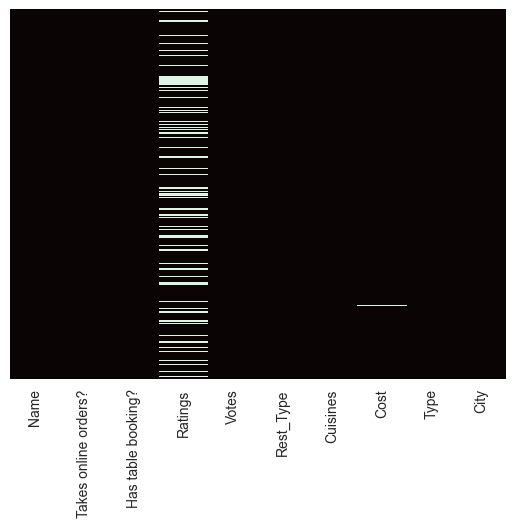

In [40]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')

In [42]:
df=df.dropna()

Step 5: Exploratory Data Analysis

How many restaurants in Bangalore take online orders?

Takes online orders?
Yes    27046
No     14144
Name: count, dtype: int64


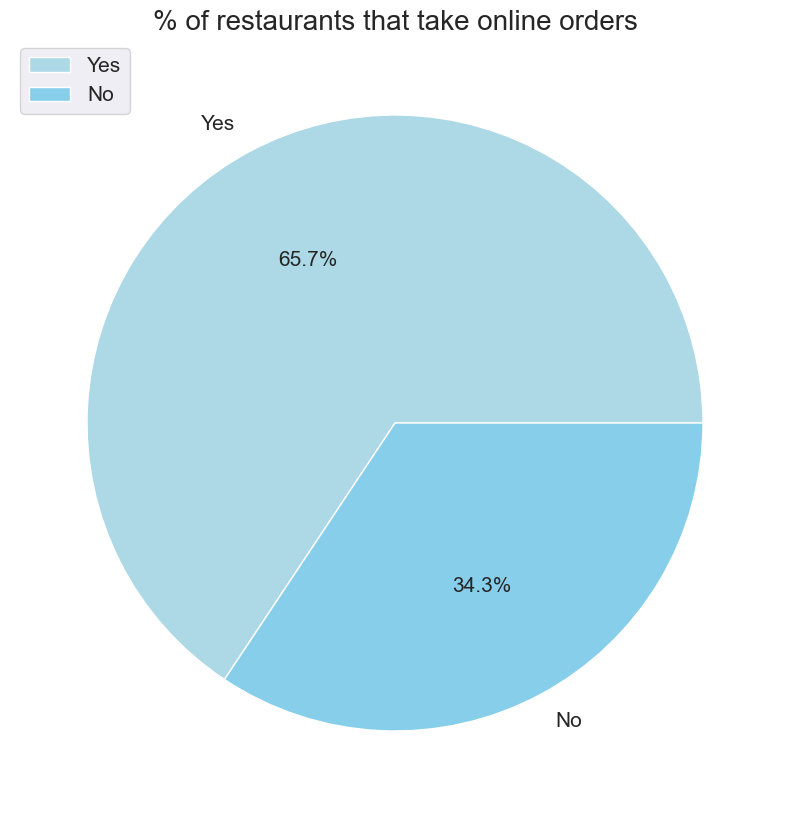

In [43]:
print(df['Takes online orders?'].value_counts())
plt.figure(figsize=(30,10))
df['Takes online orders?'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})


What percentage of restaurants offer table booking facilities?

Has table booking?
No     34915
Yes     6275
Name: count, dtype: int64


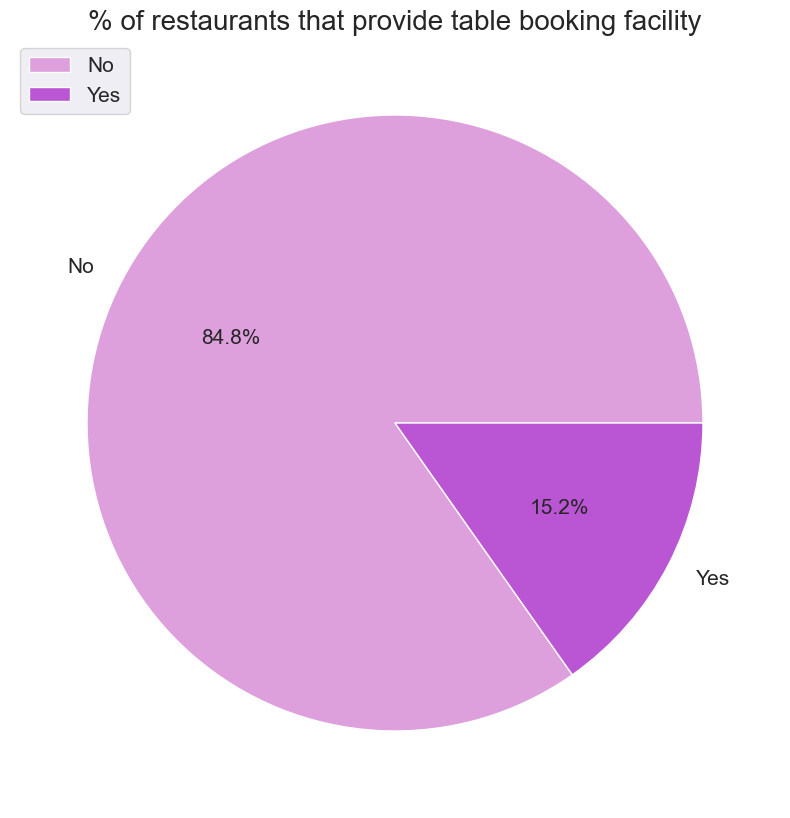

In [44]:
print(df['Has table booking?'].value_counts())
plt.figure(figsize=(30,10))
df['Has table booking?'].value_counts().plot(kind='pie',colors=['plum','mediumorchid'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that provide table booking facility',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})


The above pie chart shows that approximately 85% of the restaurants in Bangalore do not have a table booking facility through Zomato.

What was the most common rating?

Text(0, 0.5, 'Ratings Count')

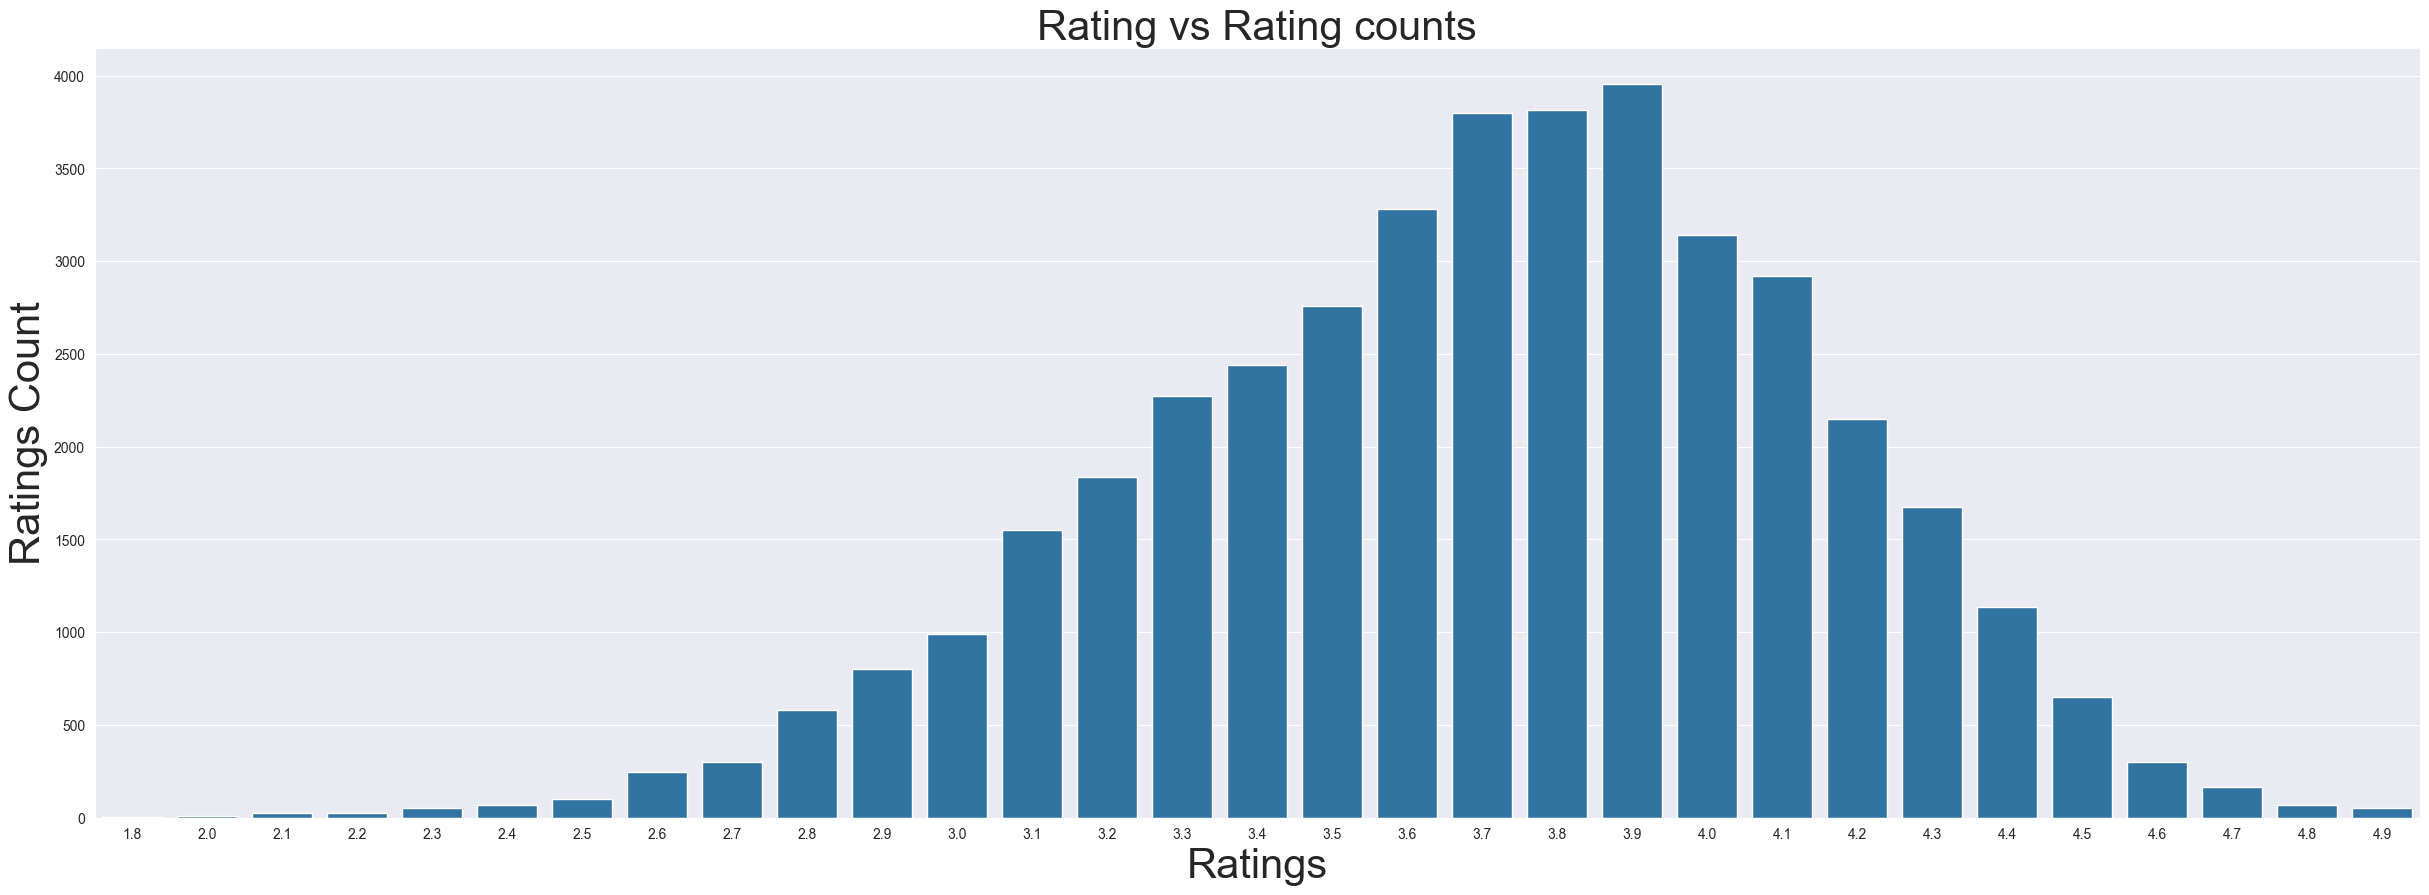

In [45]:
ratings=df.groupby(['Ratings']).size().reset_index().rename(columns={0:"Rating_Count"})
plt.figure(figsize=(30,10))
sns.barplot(x='Ratings',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=30)
plt.ylabel('Ratings Count',size=30)

Most of the restaurants in Bangalore received a rating of 3.6 to 4. Very few restaurants have poor ratings, and quite a group of restaurants has excellent ratings of 4.9 or 5.

Is there any correlation between the two people’s approximated cost and a restaurant’s ratings?

C:\Users\pushk\AppData\Local\Temp\ipykernel_11064\2916754533.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -1000.0, '-1,000'),
 Text(0, 0.0, '0'),
 Text(0, 1000.0, '1,000'),
 Text(0, 2000.0, '2,000'),
 Text(0, 3000.0, '3,000'),
 Text(0, 4000.0, '4,000'),
 Text(0, 5000.0, '5,000'),
 Text(0, 6000.0, '6,000'),
 Text(0, 7000.0, '7,000')]

<Figure size 3000x1000 with 0 Axes>

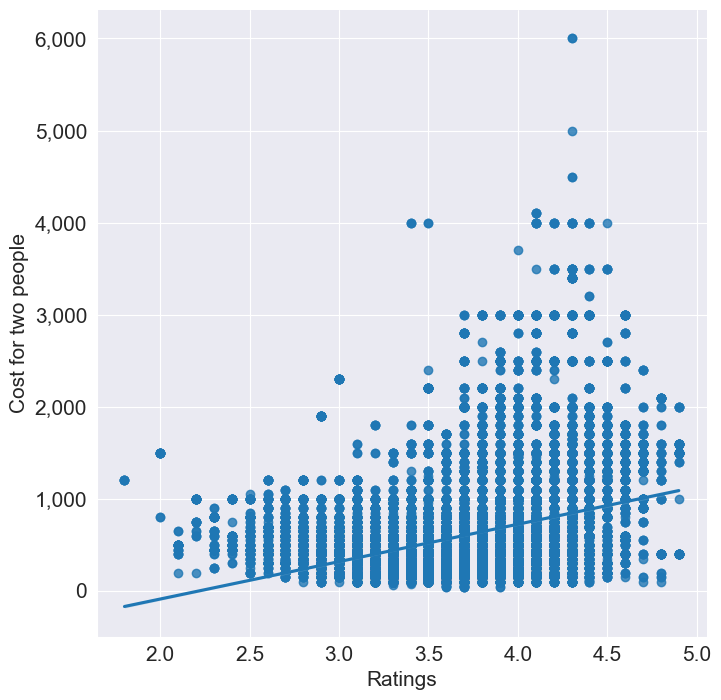

In [46]:
plt.figure(figsize=(30,10))
sns.lmplot(x='Ratings',y='Cost',data=df,height=7)
plt.xlabel('Ratings',size=15)
plt.ylabel('Cost for two people',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

As we can see, restaurants that cost less have better reviews than restaurants that are expensive

Top 5 cities in Bangalore that have a maximum number of high and low-rated restaurants.

In [47]:
a=df.groupby('City')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(a.head())

              City   Ratings
7    Church Street  3.801338
5     Brigade Road  3.800742
21         MG Road  3.799536
27  Residency Road  3.778720
20    Lavelle Road  3.774948


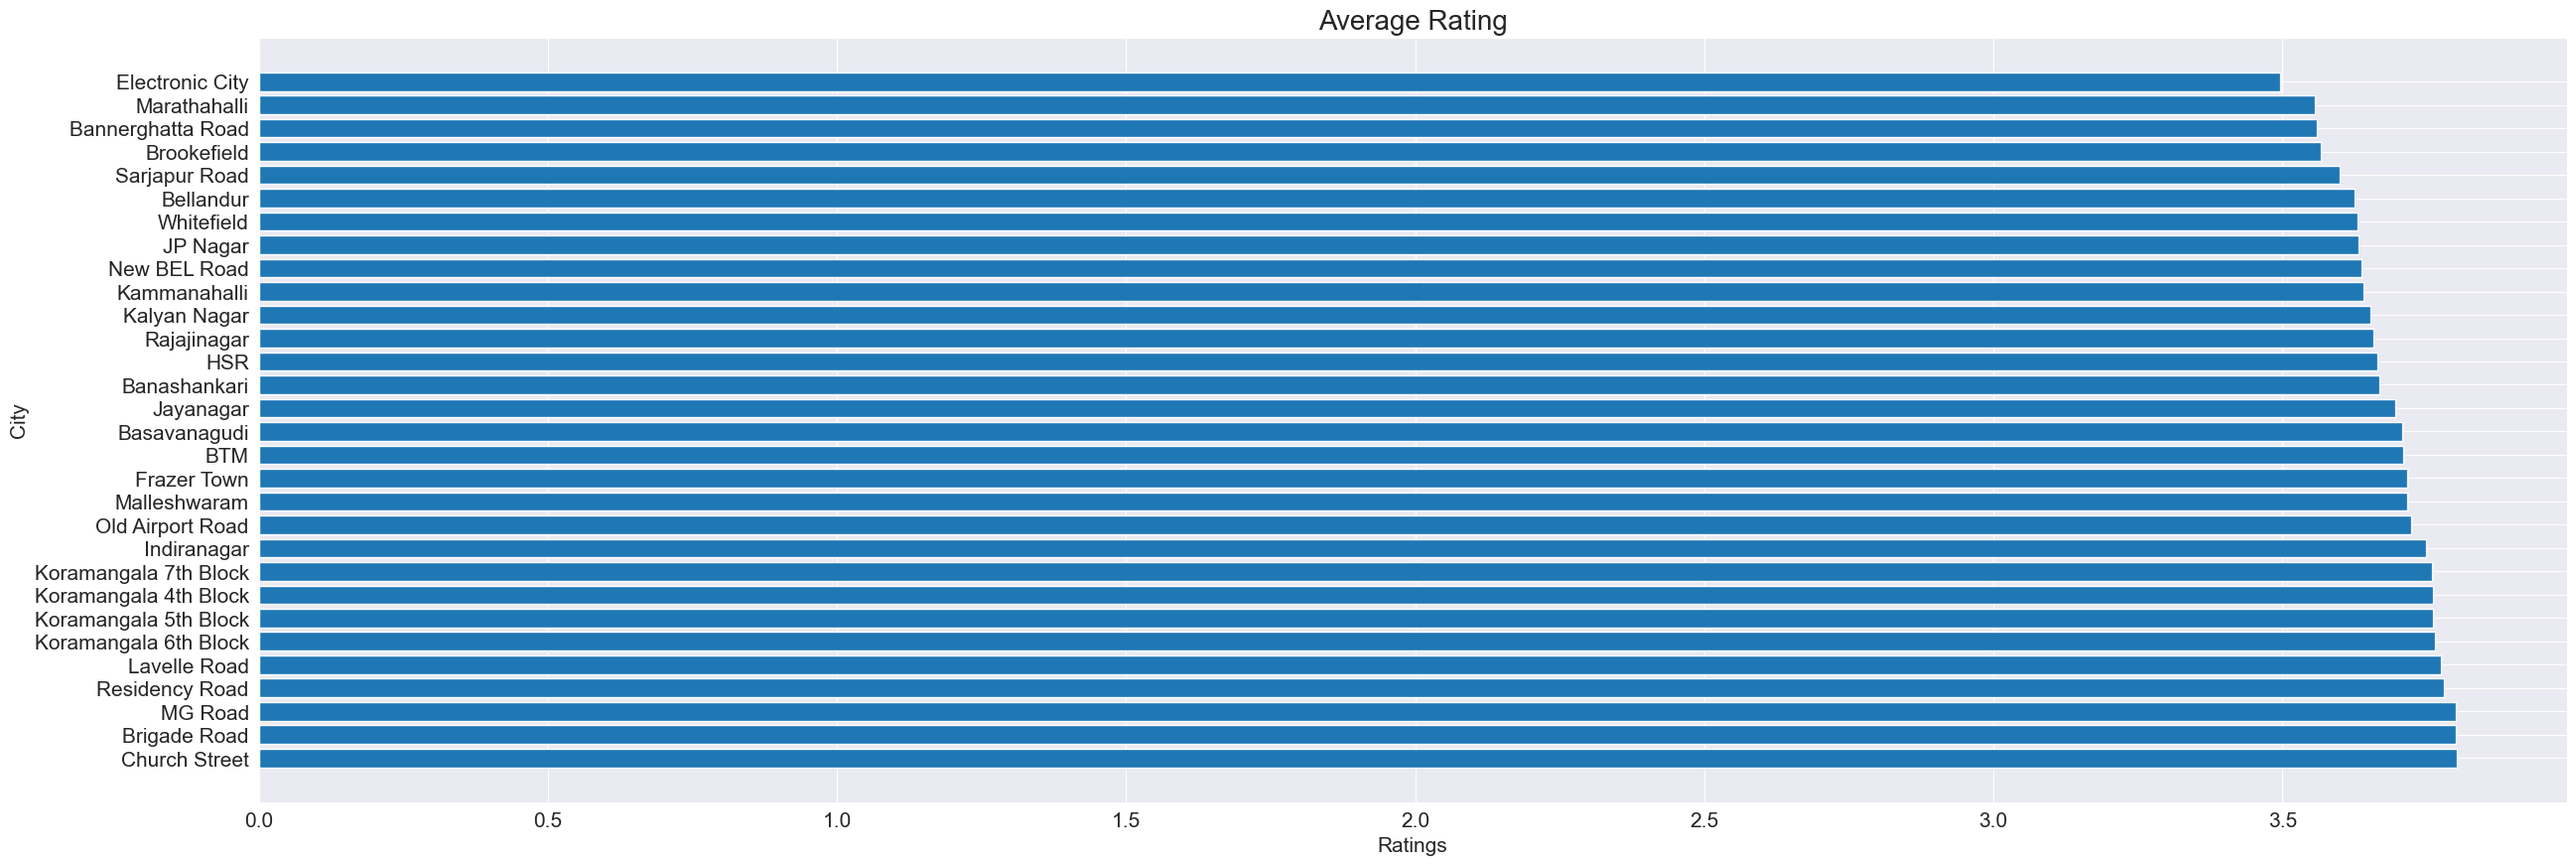

In [48]:
plt.figure(figsize=(30,10))
plt.barh(a.City,a.Ratings)
plt.xlabel('Ratings',size=15)
plt.ylabel('City',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Rating',size=20)
plt.show()

High-rated restaurants are most commonly found in Church Street, Brigade Road, and MG Road, while Electronic City has the lowest number of high-rated restaurants.

Which cuisine do customers like the most?

In [49]:
b=df.groupby('Cuisines')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)
print(b.head(5))

                                               Cuisines  Ratings
1001  Continental, North Indian, Italian, South Indi...      4.9
1274                 Healthy Food, Salad, Mediterranean      4.9
172                         Asian, Chinese, Thai, Momos      4.9
989   Continental, North Indian, Chinese, European, ...      4.8
192             Asian, Mediterranean, North Indian, BBQ      4.8


What is the average price for two people based on the type of service?

                 Type         Cost
3            Desserts   409.114064
2            Delivery   495.254631
1               Cafes   646.426208
4            Dine-out   655.081851
0              Buffet  1316.548463
6       Pubs and bars  1336.031746
5  Drinks & nightlife  1454.190751


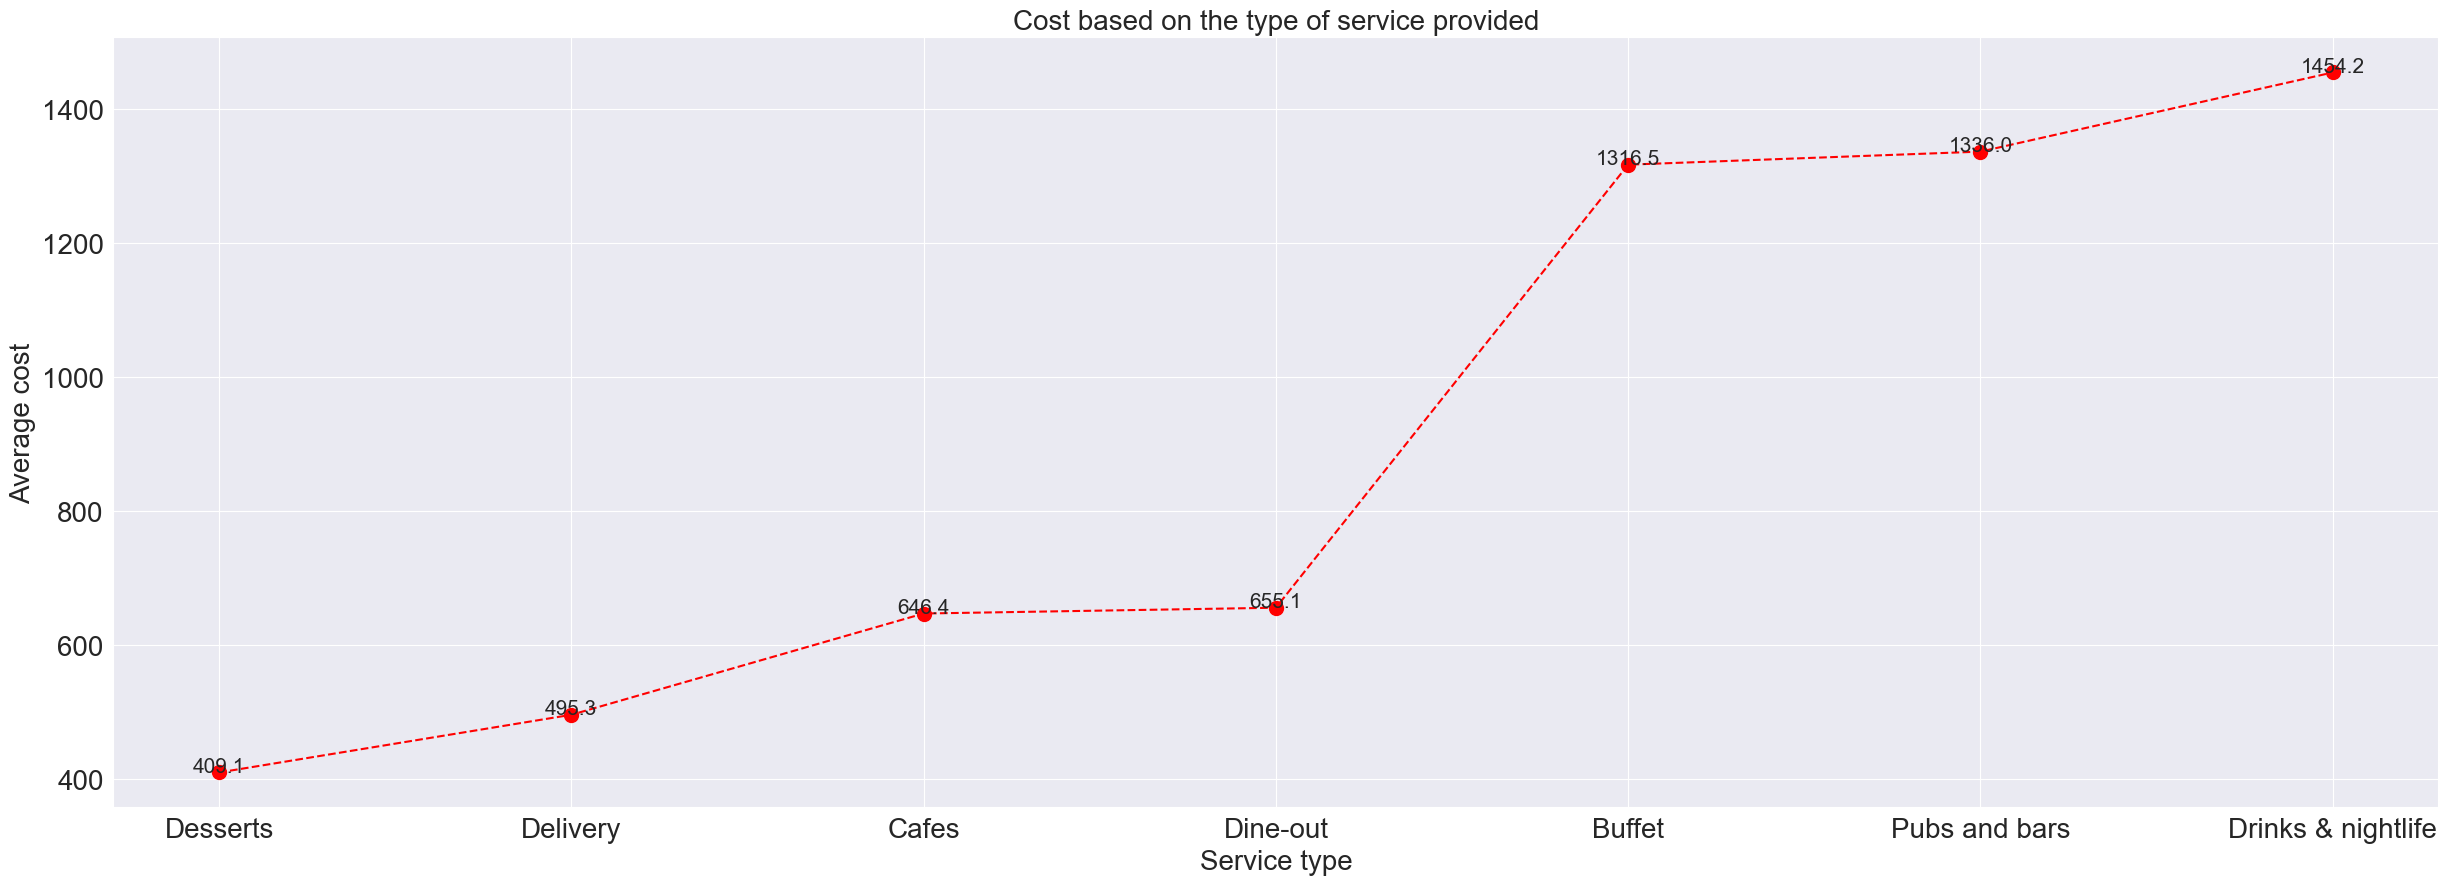

In [50]:
d=df.groupby('Type')['Cost'].mean().reset_index().sort_values(by='Cost')
print(d)
plt.figure(figsize=(30,10))
plt.plot(d['Type'],d['Cost'],'o--r',ms=10)
plt.xlabel('Service type',size=20)
plt.ylabel('Average cost',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cost based on the type of service provided',size=20)
for i,e in enumerate(d.Cost):
    plt.text(i,e+1,round(e,1),fontsize=15,horizontalalignment='center')
plt.show()

Does the restaurant’s rating depend on whether it accepts online orders or not?

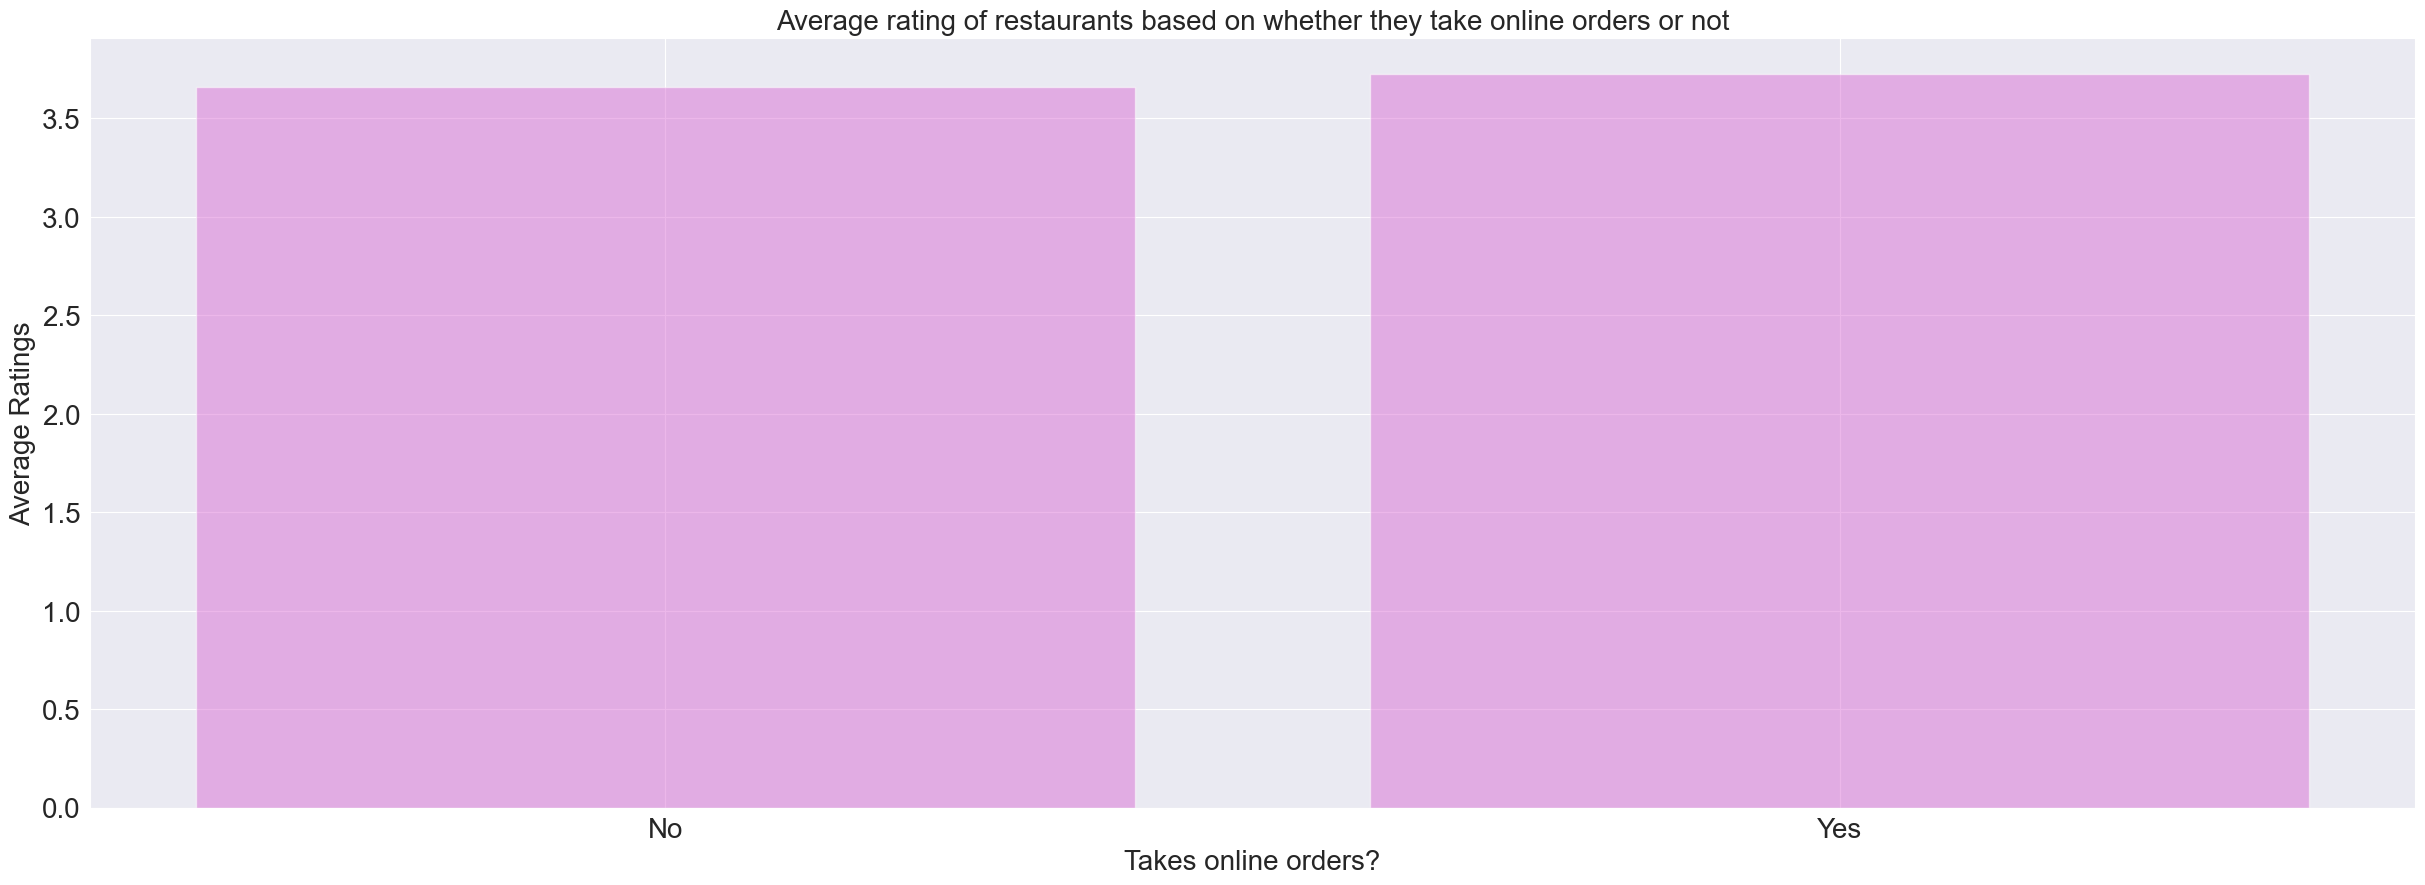

In [51]:
grp1=df.groupby('Takes online orders?')['Ratings'].mean().reset_index()
plt.figure(figsize=(30,10))
plt.bar(grp1['Takes online orders?'],grp1['Ratings'],alpha=0.5,color='orchid')
plt.xlabel('Takes online orders?',size=20)
plt.ylabel('Average Ratings',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average rating of restaurants based on whether they take online orders or not',size=20)
plt.show()

 It can be concluded that a restaurant’s success does not largely depend on the facility of taking online orders.

What are the top 10 highest-rated restaurants?

In [52]:
grp2=df.groupby('Name')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)[0:10]
print(grp2)

                                Name   Ratings
943      Byg Brewski Brewing Company  4.900000
420   Asia Kitchen By Mainland China  4.900000
4886                Sant Spa Cuisine  4.900000
4445                    Punjab Grill  4.871429
624           Belgian Waffle Factory  4.844828
5979                The Pizza Bakery  4.800000
1977                        Flechazo  4.800000
4102                 OG Variar  Sons  4.800000
88           ABs  Absolute Barbecues  4.789474
703                       Biergarten  4.766667


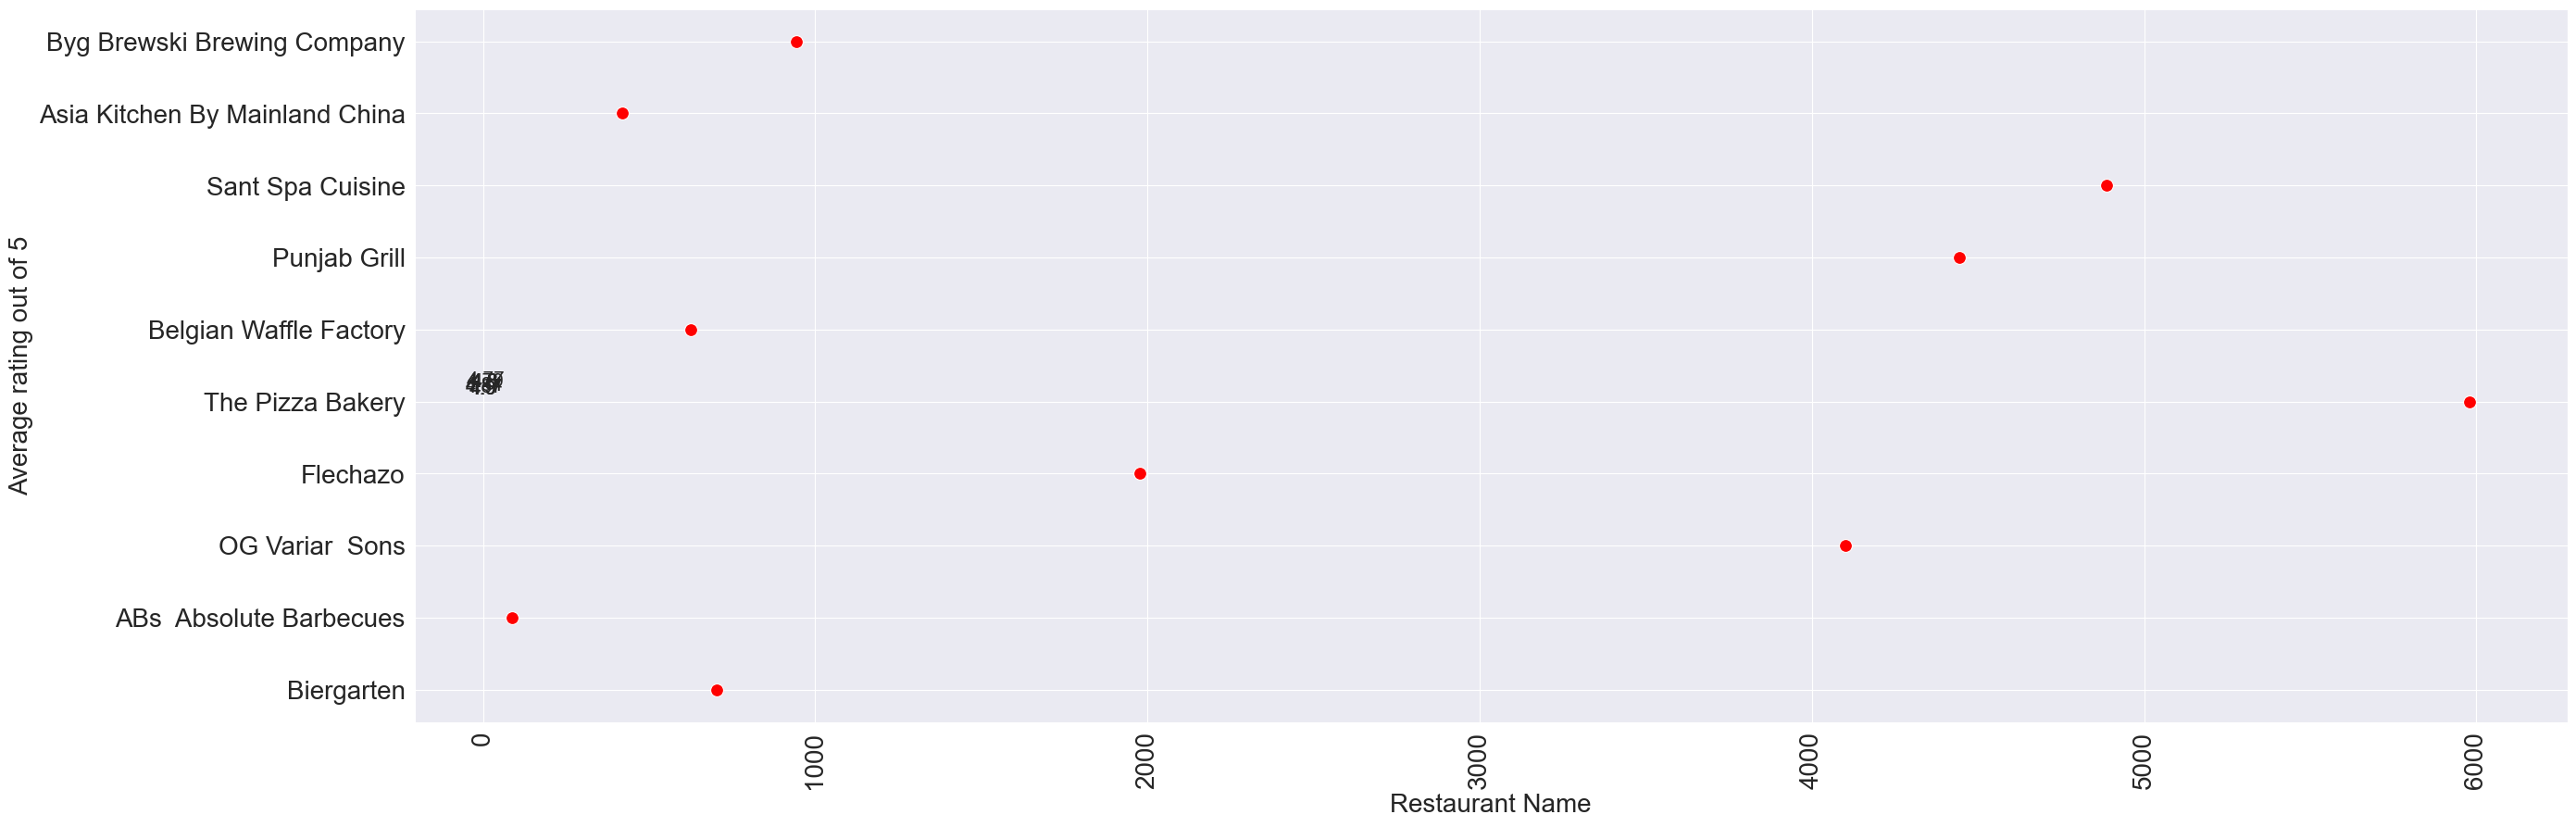

In [54]:
plt.figure(figsize=(30,10))
sns.scatterplot(grp2.Name,s=100,color='red')
for i,e in enumerate(grp2.Ratings):
    plt.text(i,e,round(e,2),fontsize=15,horizontalalignment='center')
plt.xlabel('Restaurant Name',size=20)
plt.ylabel('Average rating out of 5',size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.show()

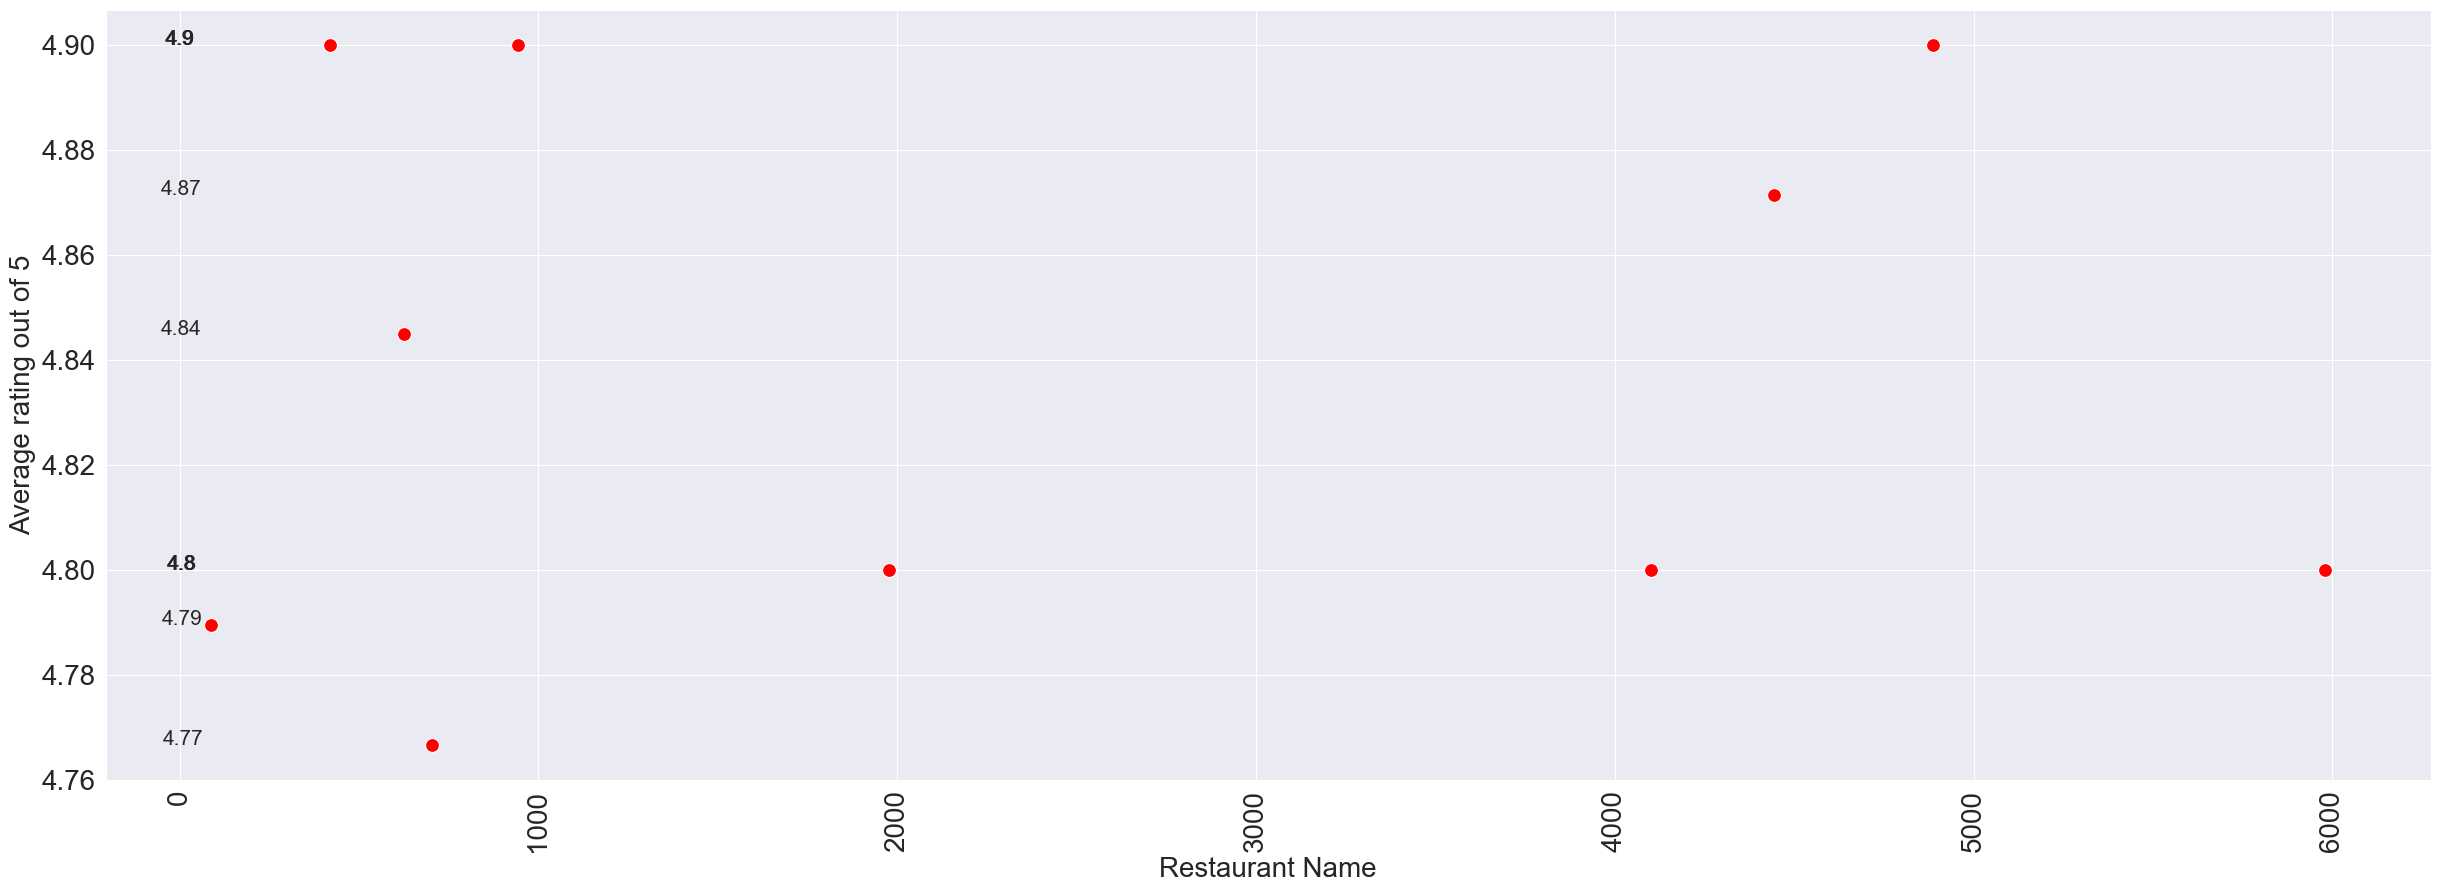

In [55]:
plt.figure(figsize=(30,10))
sns.scatterplot(grp2.Ratings,s=100,color='red')
for i,e in enumerate(grp2.Ratings):
    plt.text(i,e,round(e,2),fontsize=15,horizontalalignment='center')
plt.xlabel('Restaurant Name',size=20)
plt.ylabel('Average rating out of 5',size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.show()

Conclusion :

Here, we performed exploratory data analysis on the Zomato Bangalore Restaurants dataset and looked into the most influencing factors that led to a restaurant’s successful running in the city. The code provided here can be easily understood and used to implement EDA on other similar datasets.

Key Takeaways:

1. Restaurant ratings are highly influenced by the restaurant’s cuisine, facilities, and pricing.

2. The locality where the restaurant is situated also helps in predicting whether the restaurant will run successfully or not.

3. Places that sell desserts, beverages, and food delivery services tend to be the most popular among the customers.